# The objective of this project is to analyse the data and predict, based on a combination of dental features that describes the gender of a person.

## This is a Supervised Binary Classification problem

### Importing all required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

import matplotlib.pyplot as plt
%matplotlib inline

from collections import defaultdict
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

### Uploading the data and performing EDA

In [2]:
df = pd.read_csv('Dentistry_Dataset.csv')
df.head(10)

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246
5,6,NaN,25,Female,24.40,24.42,6.20,6.20,6.23,6.23,0.254,0.254,0.255,0.255
6,7,NaN,21,Female,28.10,28.12,6.48,6.48,6.84,6.84,0.230,0.230,0.243,0.243
7,8,NaN,18,Female,24.24,24.23,6.15,6.15,6.18,6.15,0.253,0.252,0.254,0.253
8,9,NaN,18,Female,25.95,25.95,6.74,6.78,6.74,6.74,0.259,0.261,0.259,0.259
9,10,NaN,25,Female,23.81,23.81,6.24,6.24,6.26,6.25,0.262,0.262,0.262,0.262


In [3]:
df.tail()

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
1095,1096,NaN,24,Male,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272
1096,1097,NaN,22,Male,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269
1097,1098,NaN,25,Male,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272
1098,1099,NaN,21,Male,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267
1099,1100,NaN,23,Male,24.51,24.51,6.36,6.36,6.78,6.78,0.259,0.259,0.276,0.276


In [4]:
df.shape

(1100, 14)

In [5]:
df.dtypes

Sl No                                int64
Sample ID                          float64
Age                                  int64
Gender                              object
inter canine distance intraoral    float64
intercanine distance casts         float64
right canine width intraoral       float64
right canine width casts           float64
left canine width intraoral        float64
left canine width casts            float64
right canine index intra oral      float64
right canine index casts           float64
left canine index intraoral        float64
left canine index casts            float64
dtype: object

In [6]:
df.count()

Sl No                              1100
Sample ID                             0
Age                                1100
Gender                             1100
inter canine distance intraoral    1100
intercanine distance casts         1100
right canine width intraoral       1100
right canine width casts           1100
left canine width intraoral        1100
left canine width casts            1100
right canine index intra oral      1100
right canine index casts           1100
left canine index intraoral        1100
left canine index casts            1100
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sl No                            1100 non-null   int64  
 1   Sample ID                        0 non-null      float64
 2   Age                              1100 non-null   int64  
 3   Gender                           1100 non-null   object 
 4   inter canine distance intraoral  1100 non-null   float64
 5   intercanine distance casts       1100 non-null   float64
 6   right canine width intraoral     1100 non-null   float64
 7   right canine width casts         1100 non-null   float64
 8   left canine width intraoral      1100 non-null   float64
 9   left canine width casts          1100 non-null   float64
 10  right canine index intra oral    1100 non-null   float64
 11  right canine index casts         1100 non-null   float64
 12  left canine index in

In [8]:
df.isna().sum()

Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64

In [9]:
df.describe()

,Sl No,Sample ID,Age,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
count,1100.000000,0.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,550.500000,NaN,21.625455,25.989009,25.880082,6.563000,6.564491,6.669627,6.675018,0.253122,0.252355,0.256453,0.256361
std,317.686953,NaN,2.085892,1.315292,1.862323,0.379035,0.377553,0.375841,0.377098,0.015344,0.012892,0.012355,0.012374
min,1.000000,NaN,18.000000,23.120000,6.540000,5.460000,5.460000,5.460000,5.460000,0.223000,0.223000,0.223000,0.223000
25%,275.750000,NaN,20.000000,25.000000,24.980000,6.290000,6.300000,6.400000,6.407500,0.242000,0.242000,0.247000,0.247000
50%,550.500000,NaN,22.000000,25.900000,25.900000,6.520000,6.520000,6.660000,6.680000,0.253000,0.253000,0.255000,0.255000
75%,825.250000,NaN,23.000000,26.992500,27.000000,6.802500,6.802500,6.910000,6.920000,0.262000,0.261250,0.264250,0.264000
max,1100.000000,NaN,25.000000,30.310000,30.310000,7.610000,7.600000,7.810000,7.810000,0.363000,0.302000,0.305000,0.304000


In [10]:
len(df.columns)

14

In [11]:
print(df.columns)

Index(['Sl No', 'Sample ID', 'Age', 'Gender',
       'inter canine distance intraoral', 'intercanine distance casts',
       'right canine width intraoral', 'right canine width casts',
       'left canine width intraoral', 'left canine width casts',
       'right canine index intra oral', 'right canine index casts',
       'left canine index intraoral', 'left canine index casts'],
      dtype='object')


In [12]:
for c in df.columns:
    print(f'No of unique values in {c}, {df[c].nunique()}')

No of unique values in Sl No, 1100
No of unique values in Sample ID, 0
No of unique values in Age, 8
No of unique values in Gender, 2
No of unique values in inter canine distance intraoral, 456
No of unique values in intercanine distance casts, 462
No of unique values in right canine width intraoral, 173
No of unique values in right canine width casts, 173
No of unique values in left canine width intraoral, 172
No of unique values in left canine width casts, 172
No of unique values in right canine index intra oral, 80
No of unique values in right canine index casts, 72
No of unique values in left canine index intraoral, 72
No of unique values in left canine index casts, 72


### There is equal distribution of the Gender in this dataset

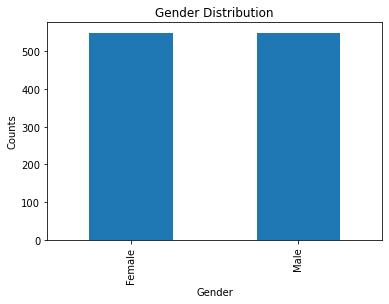

In [13]:
df['Gender'].value_counts().plot(kind='bar')
plt.title('Gender Distribution')
plt.ylabel('Counts')
plt.xlabel('Gender')
plt.show()

### Checking of age distribution

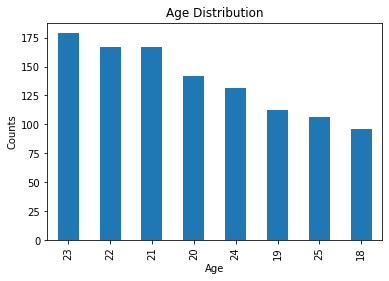

In [14]:
df['Age'].value_counts().plot(kind='bar')
plt.title('Age Distribution')
plt.ylabel('Counts')
plt.xlabel('Age')
plt.show()

In [15]:
df = df.drop(['Sl No', 'Sample ID'], axis = 1)
df.head()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [16]:
le = LabelEncoder()
df['Gender_Encoded'] = le.fit_transform(df['Gender'])

In [17]:
df.head()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts,Gender_Encoded
0,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241,0
1,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247,0
2,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264,0
3,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250,0
4,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246,0


### 0 is Female, 1 is male

In [18]:
df.tail()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts,Gender_Encoded
1095,24,Male,24.29,24.29,6.58,6.58,6.60,6.60,0.271,0.271,0.272,0.272,1
1096,22,Male,25.22,25.22,6.70,6.70,6.80,6.80,0.265,0.265,0.269,0.269,1
1097,25,Male,24.24,24.24,6.60,6.60,6.61,6.61,0.272,0.272,0.272,0.272,1
1098,21,Male,24.87,24.87,6.57,6.57,6.66,6.66,0.264,0.264,0.267,0.267,1
1099,23,Male,24.51,24.51,6.36,6.36,6.78,6.78,0.259,0.259,0.276,0.276,1


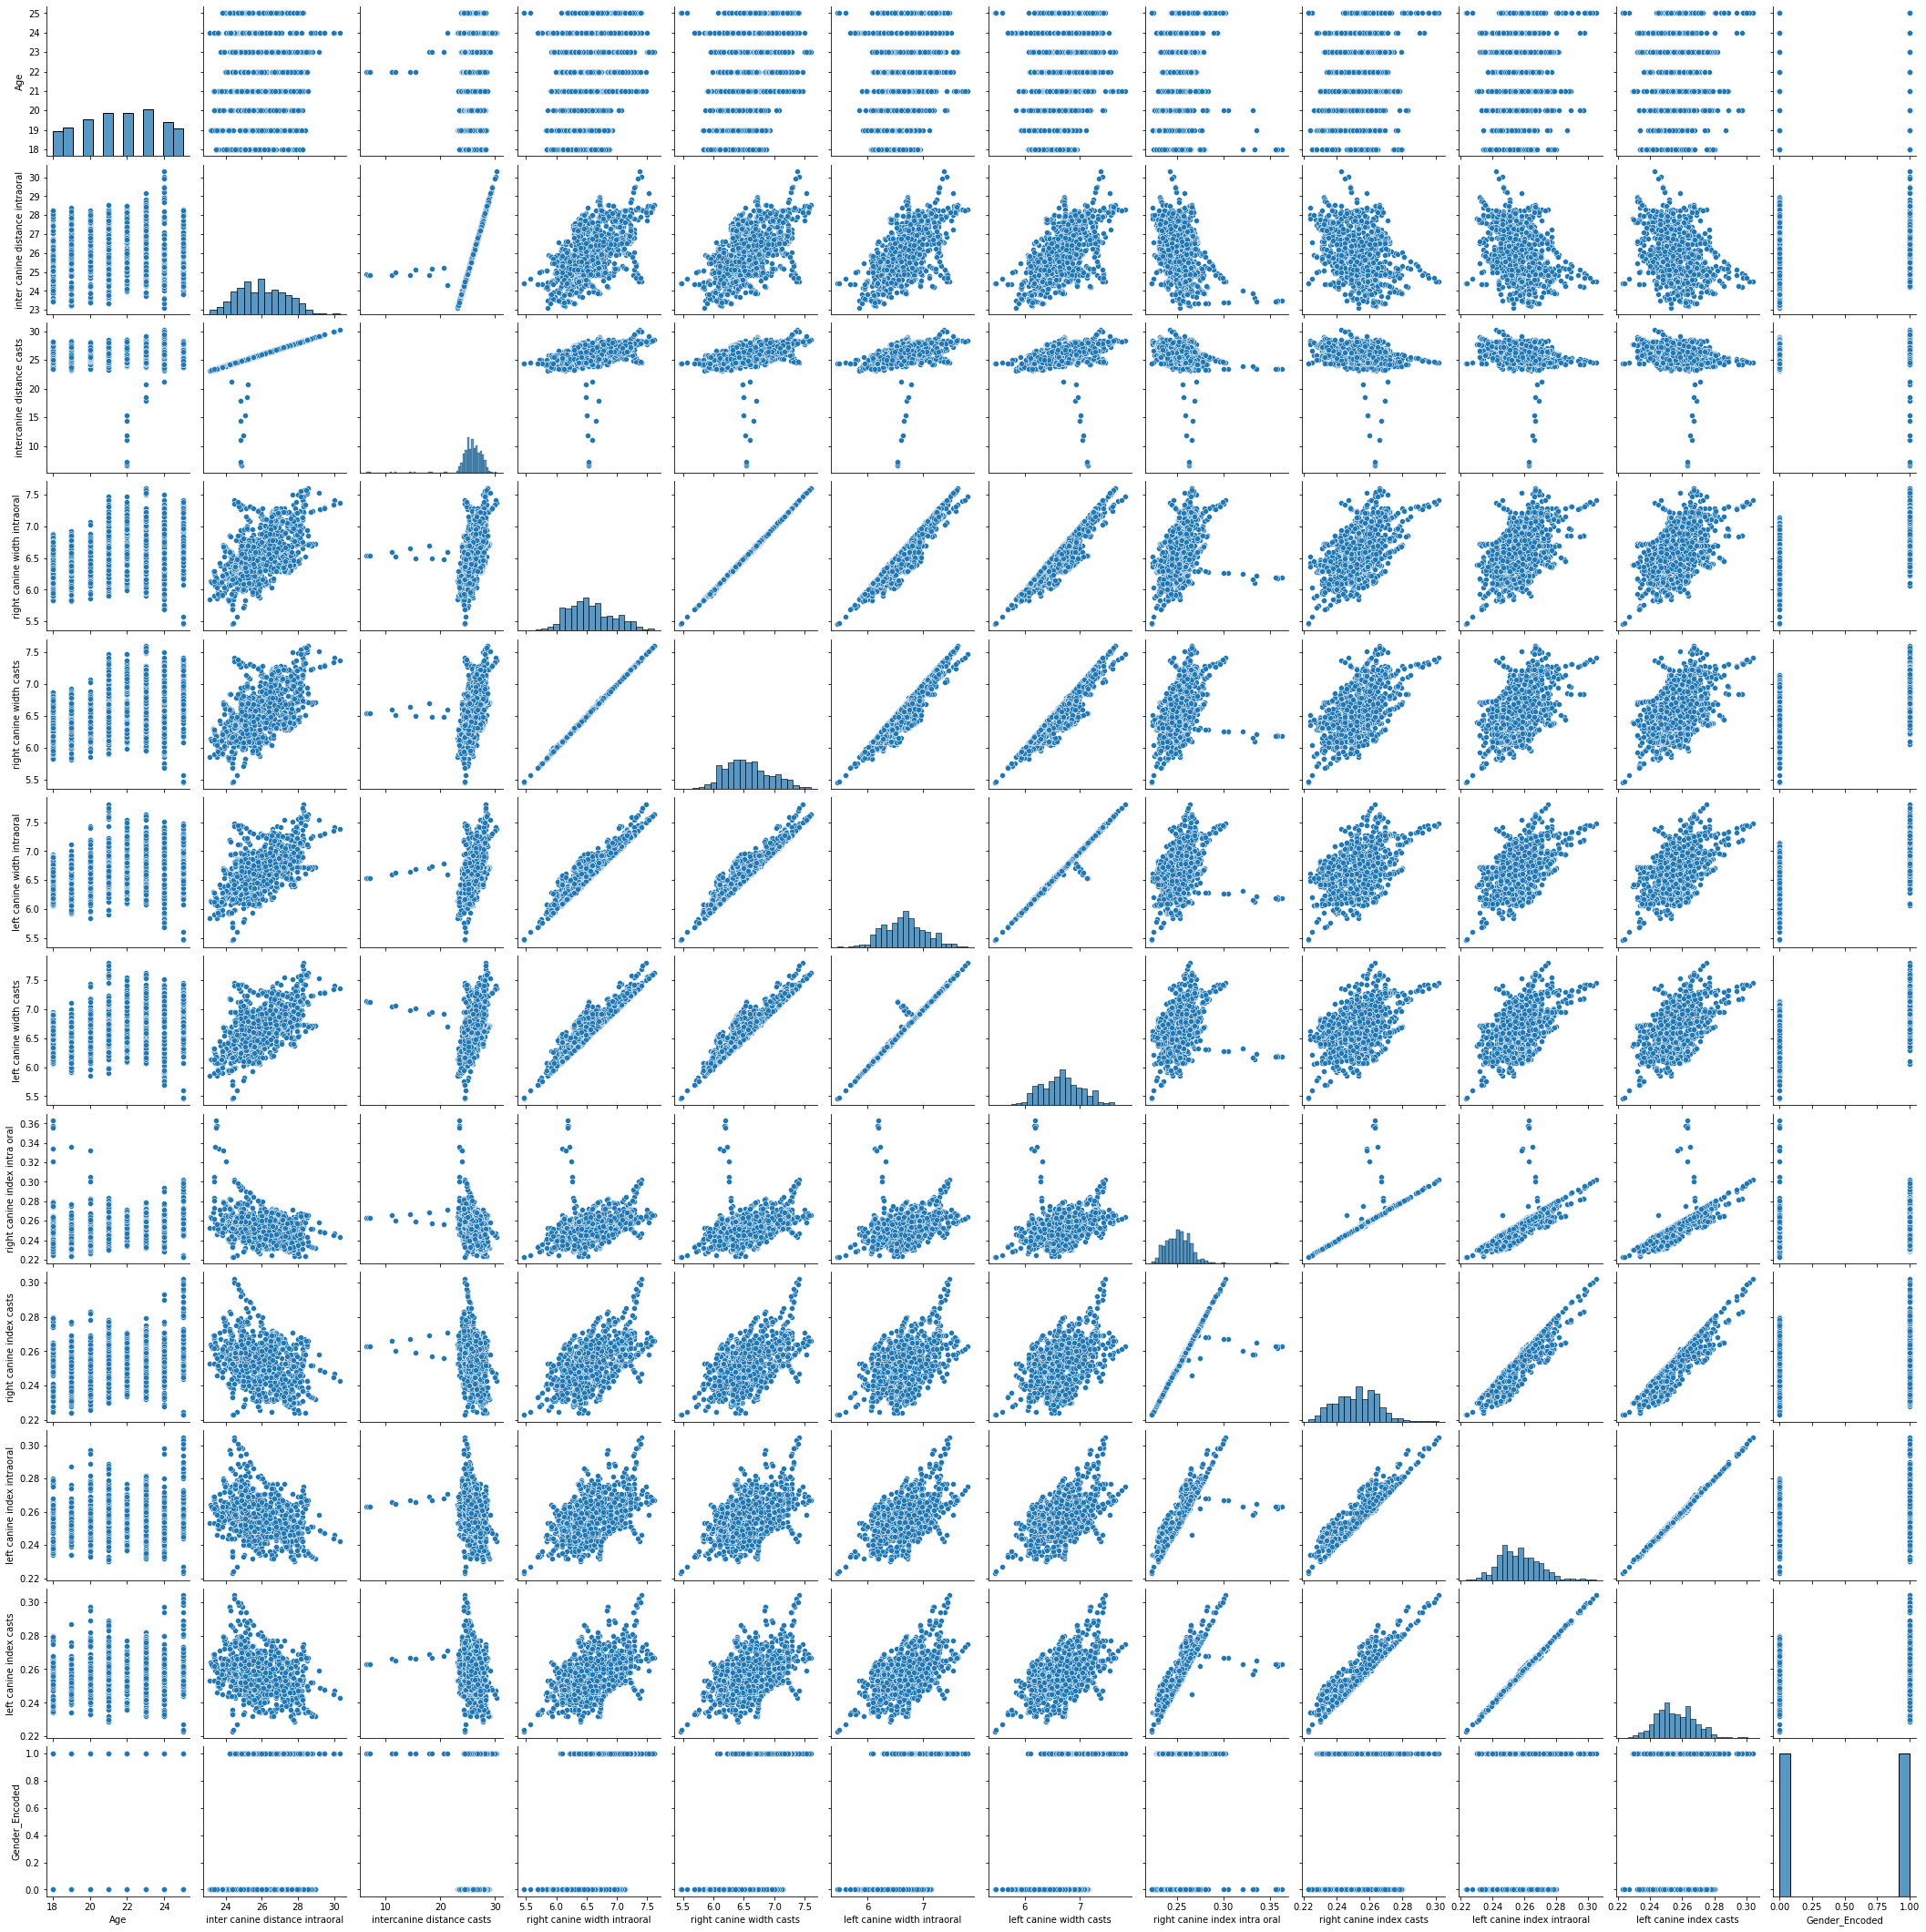

In [19]:
sns.pairplot(df)
plt.show()

<AxesSubplot:>

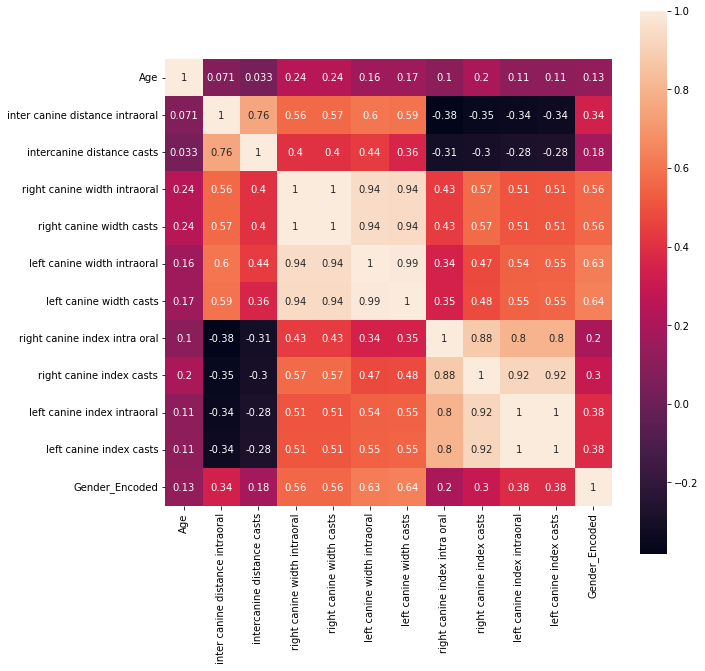

In [20]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, square = True, annot = True, ax=ax)

In [21]:
df.shape

(1100, 13)

In [22]:
# # function to remove highly correlated features

# def correlation(dataset, threshold):
#     col_corr = set() # Set of all the names of deleted columns
#     corr_matrix = dataset.corr()
#     for i in range(len(corr_matrix.columns)):
#         for j in range(i):
#             if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
#                 colname = corr_matrix.columns[i] # getting the name of column
#                 col_corr.add(colname)

#                 if colname in dataset.columns:
#                     del dataset[colname] # deleting the column from the dataset

#     return col_corr, df

# cols_removed, df = correlation(df, 0.9)

In [23]:
# df.shape

### Splitting data

In [24]:
X = df.drop(['Gender', 'Gender_Encoded', 'Age'], axis = 1)
y = df['Gender_Encoded']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1010)
X_train.shape

(880, 10)

In [26]:
y_train.shape

(880,)

In [27]:
# norm = Normalizer()
# X_train_norm = norm.fit_transform(X_train)
# X_test_norm = norm.transform(X_test)

In [28]:
# norm = Normalizer()
# X_train_norm = norm.fit_transform(X_train)
# X_test_norm = norm.fit_transform(X_test)

In [29]:
# ss = StandardScaler()
# X_train_norm = ss.fit_transform(X_train)
# X_test_norm = ss.transform(X_test)

In [30]:
ss_train = StandardScaler()
X_train_norm = ss_train.fit_transform(X_train)
ss_test = StandardScaler()
X_test_norm = ss_test.fit_transform(X_test)

In [31]:
# minmax = MinMaxScaler()
# X_train_norm = minmax.fit_transform(X_train)
# X_test_norm = minmax.transform(X_test)

In [32]:
# minmax = MinMaxScaler()
# X_train_norm = minmax.fit_transform(X_train)
# X_test_norm = minmax.fit_transform(X_test)

In [33]:
X_train_norm.shape

(880, 10)

In [34]:
X_test_norm.shape

(220, 10)

In [35]:
X_train_norm

array([[-0.79270395, -0.51989463,  2.06241152, ...,  3.23668907,
         3.40508264,  3.32260076],
       [-1.88279099, -1.34544446, -0.9824933 , ...,  0.78461104,
         0.48082289,  0.4871773 ],
       [ 1.97444007,  1.51570768,  0.42081066, ..., -1.35106983,
        -1.71237193, -1.70014936],
       ...,
       [-0.69360513, -0.46335012, -0.77067384, ..., -0.32277904,
        -0.41270093, -0.40395578],
       [ 1.52468388,  1.18209508,  1.74468232, ...,  0.38911458,
         0.15590514,  0.16312891],
       [-1.32631299, -0.93832399, -0.9824933 , ...,  0.15181671,
        -0.08778318, -0.07990739]])

### Testing with Logistic regression first

In [36]:
model_test = LogisticRegression(random_state=1010)
model_test.fit(X_train_norm, y_train)
predictions = model_test.predict(X_test_norm)

In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  88
False Positive(FP) =  14
True Negative(TN)  =  88
False Negative(FN) =  30


In [38]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy of the binary classifier = 0.800


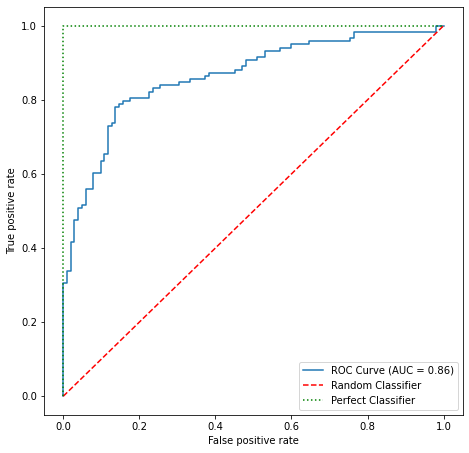

In [39]:
from sklearn.metrics import roc_curve, auc

#define metrics
y_pred_proba = model_test.predict_proba(X_test_norm)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

#create ROC curve
fig, ax = plt.subplots(figsize=(7.5, 7.5))
 
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

### Comparing multiple models

In [40]:
seed = 1010
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression(random_state=seed)

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC(random_state=seed)

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier(random_state=seed)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier(random_state=seed)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

# XGBoost
import xgboost as xgb
models['XGBoost'] = xgb.XGBClassifier(random_state=seed)

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier
    models[key].fit(X_train_norm, y_train)
    
    # Make predictions
    predictions = models[key].predict(X_test_norm)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [42]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.800000,0.745763,0.862745
Support Vector Machines,0.795455,0.737288,0.861386
Decision Trees,0.750000,0.762712,0.769231
Random Forest,0.790909,0.762712,0.833333
Naive Bayes,0.768182,0.703390,0.838384
K-Nearest Neighbor,0.818182,0.788136,0.861111
XGBoost,0.813636,0.796610,0.846847


### XGBoost Classifier has the highest Precision

In [43]:
xgb = xgb.XGBClassifier(random_state=seed)

xgb.fit(X_train_norm, y_train)
test_pred = xgb.predict(X_test_norm)

print(f1_score(y_test, test_pred), '\n'), confusion_matrix(y_test, test_pred)

0.8209606986899564 



(None,
 array([[85, 17],
        [24, 94]], dtype=int64))

In [44]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       102
           1       0.85      0.80      0.82       118

    accuracy                           0.81       220
   macro avg       0.81      0.81      0.81       220
weighted avg       0.82      0.81      0.81       220



### Hyperparameter tuning for XGBoost Classifier

In [45]:
from sklearn.model_selection import RandomizedSearchCV

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Create the random grid
param = { 'max_depth': max_depth,
           'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 10000, num = 10)]}

print(param)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3], 'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9]), 'colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), 'colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]), 'n_estimators': [200, 1288, 2377, 3466, 4555, 5644, 6733, 7822, 8911, 10000]}


In [46]:
import xgboost as xgb
# Use the random grid to search for best hyperparameters
# First create the base model to tune
xgb = xgb.XGBClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = param, n_iter = 100, cv = 3, verbose=2, random_state=seed, n_jobs = -1)

# Fit the random search model
xgb_random.fit(X_train_norm, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                   param_distributions={'colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                      

In [47]:
xgb_random.best_params_

{'subsample': 0.6,
 'n_estimators': 200,
 'max_depth': 40,
 'learning_rate': 0.2,
 'colsample_bytree': 0.7,
 'colsample_bylevel': 0.4}

In [48]:
import xgboost as xgb

def evaluate(model, X_test_norm, y_test):
    predictions = model.predict(X_test_norm)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = accuracy_score(predictions, y_test)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = xgb.XGBClassifier(n_estimators = 10, random_state = seed)
base_model.fit(X_train_norm, y_train)
base_accuracy = evaluate(base_model, X_test_norm, y_test)

Model Performance
Average Error: 0.2045 degrees.
Accuracy = 0.80%.


In [49]:
best_random = xgb_random.best_estimator_
random_accuracy = evaluate(best_random, X_test_norm, y_test)

Model Performance
Average Error: 0.1818 degrees.
Accuracy = 0.82%.


In [50]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 2.86%.


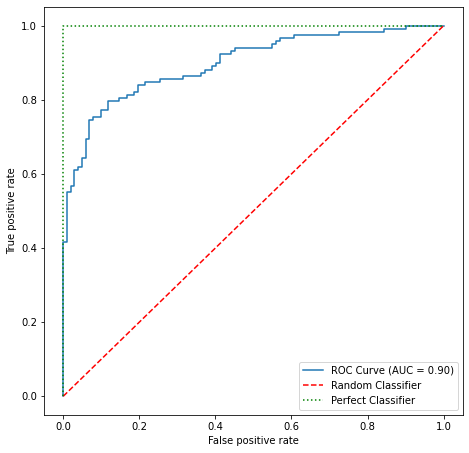

In [51]:
from sklearn.metrics import roc_curve, auc

#define metrics
y_pred_proba = best_random.predict_proba(X_test_norm)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

#create ROC curve
fig, ax = plt.subplots(figsize=(7.5, 7.5))
 
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')   
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', color='green', label='Perfect Classifier')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()

### Conclusion:
During EDA, I have decided to one drop ['Sl No', 'Sample ID', 'Age']. If we remove data any further, we will be omitting essential data especially if the unknown subject has a dental implant or missing teeth. Besides, age might not be known in a forensic setting.

The XGBoost Classifier algorithm gave the highest accuracy in this experiment at 80%. After performing hyperparameter tuning the accuracy increased with an improvement of 2.86% at 82%.

A more precise prediction can be done by using artificial neural network on the dataset or dental X-ray images dataset with deep learning.